In [1]:
import numpy as np
import pandas as pd
#import time dependencies
from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests
import matplotlib.ticker as mticker
import matplotlib as mpl
from matplotlib.dates import date2num

In [2]:
#Line Graphs
start_date = "2016-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

#Bar Charts-3 bars and one pie chart
start_date_now = "2020-4-01"
end_date_now =  datetime.datetime.now()

In [3]:
DUCInventory='duc-data.csv'
DUCInventory_df=pd.read_csv(DUCInventory, header=[1]) 
DUCInventory_df=pd.read_csv(DUCInventory, header=[2])
# DUCInventory_df=DUCInventory_df.columns.droplevel(5)
DUCInventory_df.columns = ['Date','Anadarko_Drilled','Anadarko_Completed','Anadarko_DUC','Unnamed: 4','Appalachia_Drilled','Appalachia_Completed','Appalachia_DUC','Unnamed: 8','Bakken_Drilled','Bakken_Completed','Bakken_DUC','Unnamed: 12','Eagle Ford_Drilled','Eagle Ford_Completed', 'Eagle Ford_DUC', 'Unnamed: 16','Haynesville_Drilled','Haynesville_Completed','Haynesville_DUC', 'Unnamed: 20', 'Niobrara_Drilled','Niobrara_Completed', 'Niobrara_DUC','Unnamed: 24','Permian_Drilled','Permian_Completed', 'Permian_DUC','Unnamed: 28', 'DPR_Drilled','DPR_Completed','DPR_DUC']                                         

del DUCInventory_df['Unnamed: 4']
del DUCInventory_df['Unnamed: 8']
del DUCInventory_df['Unnamed: 12']
del DUCInventory_df['Unnamed: 16']
del DUCInventory_df['Unnamed: 20']
del DUCInventory_df['Unnamed: 24']
del DUCInventory_df['Unnamed: 28']

DUCInventory_df=DUCInventory_df.iloc[2:81, ]

In [4]:
#The data was an object, so we need to convert that to an int
#Needed to get rid of the commas so we convt to a string and then to an int
DUCInventory_df['Anadarko_DUC']=pd.to_numeric(DUCInventory_df['Anadarko_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Appalachia_DUC']=pd.to_numeric(DUCInventory_df['Appalachia_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Bakken_DUC']=pd.to_numeric(DUCInventory_df['Bakken_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Eagle Ford_DUC']=pd.to_numeric(DUCInventory_df['Eagle Ford_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Haynesville_DUC']=pd.to_numeric(DUCInventory_df['Haynesville_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Niobrara_DUC']=pd.to_numeric(DUCInventory_df['Niobrara_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['Permian_DUC']=pd.to_numeric(DUCInventory_df['Permian_DUC'].astype(str).str.replace(',',''), errors='coerce')
DUCInventory_df['DPR_DUC']=pd.to_numeric(DUCInventory_df['DPR_DUC'].astype(str).str.replace(',',''), errors='coerce')

#if have a date format like Jan-14 for the month and year:
#then you can use pd.to_datetime(df['column'], format=%b-%y)
DUCInventory_df['Date'] = pd.to_datetime(DUCInventory_df["Date"], format='%b-%y')

In [5]:
#access the first column
# data.iloc[:, <column_number>]
DUCInventory_df.iloc[:,0].dtypes

dtype('<M8[ns]')

In [6]:
#linegraphs
DUCInventory_date_df = DUCInventory_df[(DUCInventory_df['Date']> start_date) & (DUCInventory_df['Date']< end_date)]

# The dtype of the NumPy record array for the field date is datetime64[D] 
# which means it is a 64-bit np.datetime64 in 'day' units. 
# While this format is more portable, 
# Matplotlib cannot plot this format natively yet. 
# We can plot this data by changing the dates to datetime.date 
# instances instead, which can be achieved by converting to an object array
DUCInventory_date_df['Permian_DUC'] = DUCInventory_date_df['Permian_DUC']

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


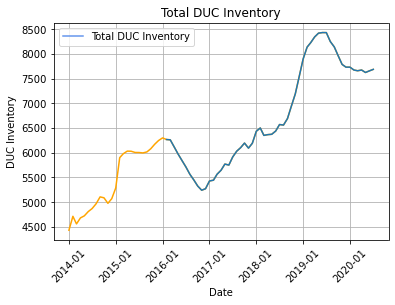

In [7]:
# #This is kind of a cool trick. 
# I plotted The whole thing from 2014 to now in line 7 with DUCInventory_df
# Then I plotted only from 2019 at the bottom with DUCInventory_date_df to get another color
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_df['Date'],DUCInventory_df['DPR_DUC'], color='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("Total DUC Inventory")
ax.grid()

# defining legend style and data
blue_line = mlines.Line2D([], [], color='CornflowerBlue', label='Total DUC Inventory')
plt.legend(handles=[blue_line])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
plt.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['DPR_DUC'])
# plt.show()

[]

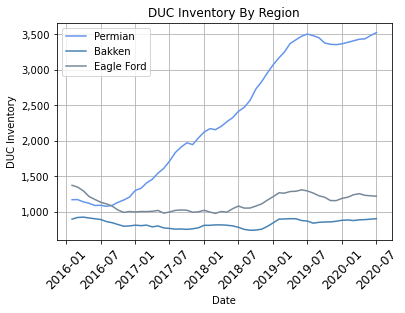

In [8]:
from matplotlib.ticker import FixedLocator, LinearLocator, FormatStrFormatter
# plot just crude prices on one graph
fig, ax=plt.subplots(frameon=False)

ax.set_xlabel('Date')
ax.set_ylabel('DUC Inventory')
ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Permian_DUC'], color='CornflowerBlue')
ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Bakken_DUC'], color='steelblue')
ax.plot(DUCInventory_date_df['Date'],DUCInventory_date_df['Eagle Ford_DUC'], color='lightslategray')


# ticks = [np.datetime64('2000-%02d-01'%month) for month in range(1, 13)]
# ax.set_xticks(ticks)




# ticks = pd.date_range(start_date, end_date, freq='Y')
# ax.set_xticks(ticks)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# _=plt.xticks(rotation=45)



# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 100))



show_every = 10
sparse_xticks = [None] * DUCInventory_date_df['Date'].shape[0]
sparse_xticks[::show_every] = DUCInventory_date_df['Date'][::show_every]
ax.set_xticklabels(sparse_xticks, fontsize=12)   # set sparse xtick values



ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax.tick_params(axis='y', length= 10)
ax.set_title("DUC Inventory By Region")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

# defining legend style and data
lineOne = mlines.Line2D([], [], color='CornflowerBlue', label='Permian')
lineTwo = mlines.Line2D([], [], color='steelblue', label='Bakken')
lineThree = mlines.Line2D([], [], color='lightslategray', label='Eagle Ford')
plt.legend(handles=[lineOne, lineTwo, lineThree])
plt.savefig("Total DUC Inventory.png", bbox_inches='tight')
plt.plot()

In [9]:
# DUCInventory_date_df=pd.DataFrame(DUCInventory_date_df)
DUCInventory_date_df.set_index('Date', inplace=True)
DUCInventory_date_df

,Anadarko_Drilled,Anadarko_Completed,Anadarko_DUC,Appalachia_Drilled,Appalachia_Completed,Appalachia_DUC,Bakken_Drilled,Bakken_Completed,Bakken_DUC,Eagle Ford_Drilled,...,Haynesville_DUC,Niobrara_Drilled,Niobrara_Completed,Niobrara_DUC,Permian_Drilled,Permian_Completed,Permian_DUC,DPR_Drilled,DPR_Completed,DPR_DUC
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,98,91,606,75,84,1178,62,41,896,113,...,167,79,82,877,192,220,1169,631,664,6265
2016-03-01,81,80,607,72,76,1174,68,45,919,88,...,161,61,58,880,215,213,1171,593,599,6259
2016-04-01,64,69,602,54,71,1157,44,39,924,66,...,151,42,75,847,183,215,1139,468,613,6114
2016-05-01,77,57,622,58,79,1136,47,59,912,60,...,151,63,92,818,172,192,1119,490,632,5972
2016-06-01,61,64,619,50,65,1121,43,54,901,62,...,141,58,81,795,192,223,1088,483,617,5838
2016-07-01,74,90,603,43,84,1080,46,56,891,62,...,140,67,91,771,193,190,1091,503,631,5710
2016-08-01,75,75,603,49,77,1052,53,82,862,99,...,129,73,114,730,239,254,1076,604,752,5562
2016-09-01,73,97,579,42,72,1022,49,66,845,87,...,132,67,97,700,251,237,1090,587,703,5446
2016-10-01,98,131,546,48,97,973,60,85,820,80,...,123,78,73,705,273,231,1132,655,777,5324


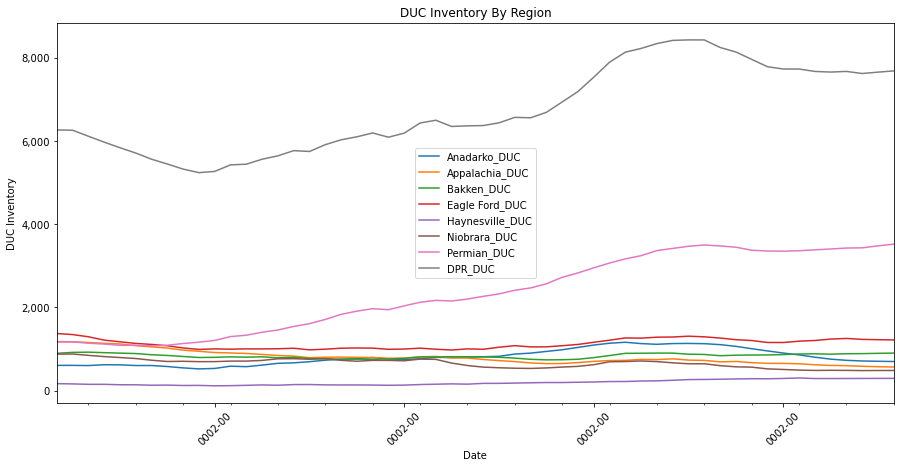

In [10]:
fig, ax =plt.subplots(figsize=(15,7))
DUCInventory_date_df.plot(ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


# ticks = [np.datetime64('2000-%02d-01'%month) for month in range(1, 13)]
# ax.set_xticks(ticks)




ticks = pd.date_range(start_date, end_date, freq='Y')
ax.set_xticks(ticks)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M'))
_=plt.xticks(rotation=45)



# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 100))











# show_every = 10
# sparse_xticks = [None] * DUCInventory_date_df.index.shape[0]
# sparse_xticks[::show_every] = DUCInventory_date_df.index[::show_every]
# ax.set_xticklabels(sparse_xticks, fontsize=12)   # set sparse xtick values











plt.ylabel('DUC Inventory')
plt.title('DUC Inventory By Region')
ax.xaxis_date()
# _=plt.xticks(rotation=45)
plt.show()

In [11]:
#bar and pie charts
DUCInventory_now_df=DUCInventory_date_df[(DUCInventory_date_df.index>start_date_now) & (DUCInventory_date_df.index < end_date_now)]

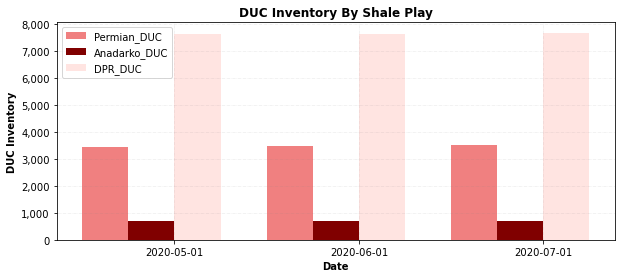

<Figure size 432x288 with 0 Axes>

In [12]:
# # plt.subplots() #return tuple that contains figure and axes objects
# fig, ax=plt.subplots() #unpack tuple into variables figure and ax
# ax.plot(x_axis, y_axis)
# # gca() #get current axis

#pandas does not know datetime so turn it into pandas.Timestamp into datetime
f=DUCInventory_now_df.index.to_pydatetime()
figure, ax=plt.subplots(figsize=(10,4))

number_groups=len(['Permian_DUC', 'Anadarko_DUC', 'DPR_DUC'])
numerical=[DUCInventory_now_df['Permian_DUC'],DUCInventory_now_df['Anadarko_DUC'],DUCInventory_now_df['DPR_DUC']]
bin_width=1.0/(number_groups+1)
colors = ['lightcoral', 'maroon', 'mistyrose'] 


for i in range(number_groups):
    ax.bar(x=np.arange(len(['Permian_DUC', 'Anadarko_DUC', 'DPR_DUC']))+ i*bin_width,
          height=numerical[i],
          width=bin_width,
          color=colors[i])
ax.set_xticks(np.arange(len(['Permian_DUC', 'Anadarko_DUC', 'DPR_DUC'])) + number_groups/(2*(number_groups+1)))

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(['2020-05-01', '2020-06-01', '2020-07-01'])
ax.legend(['Permian_DUC', 'Anadarko_DUC', 'DPR_DUC'], facecolor='w')
# ax.gird()
plt.xlabel('Date', fontweight='bold')
plt.ylabel('DUC Inventory', fontweight='bold')
plt.title ("DUC Inventory By Shale Play", fontweight='bold')
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.show()
plt.savefig('DUC Inventory Bar')

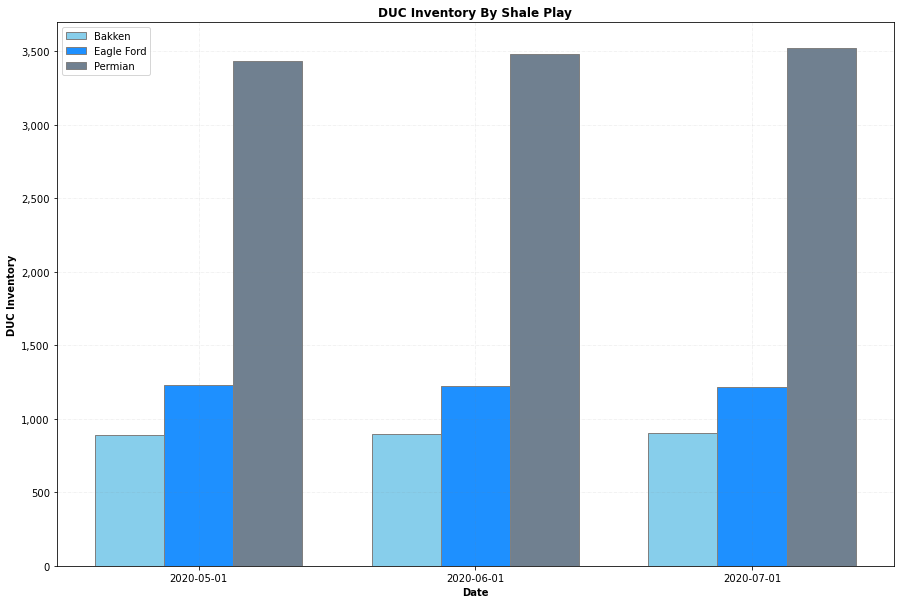

<Figure size 432x288 with 0 Axes>

In [13]:
#pandas does not know datetime so turn it into pandas.Timestamp into datetime
f=DUCInventory_now_df.index.to_pydatetime()
figure, ax=plt.subplots(figsize=(15,10)) 
bars1=[0.25,0.5,0.75]
barWidth=0.25

# Set position of bar on X axis 
br1 = np.arange(len(bars1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
#set the plot
plt.bar(br1,DUCInventory_now_df['Bakken_DUC'], color='skyblue', width=barWidth, label='Permian', edgecolor='grey')
plt.bar(br2,DUCInventory_now_df['Eagle Ford_DUC'], color='dodgerblue', width=barWidth, label='Permian', edgecolor='grey')
plt.bar(br3,DUCInventory_now_df['Permian_DUC'], color='slategrey', width=barWidth, label='Permian', edgecolor='grey')

plt.xticks([r + barWidth for r in range(len(DUCInventory_now_df['Bakken_DUC']))], 
           ['2020-05-01', '2020-06-01', '2020-07-01'])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
ax.legend(['Bakken', 'Eagle Ford', 'Permian'], facecolor='w')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('DUC Inventory', fontweight='bold')
plt.title ("DUC Inventory By Shale Play", fontweight='bold')
plt.show()
plt.savefig('DUC Inventory Bar2')

C:\Users\15124\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


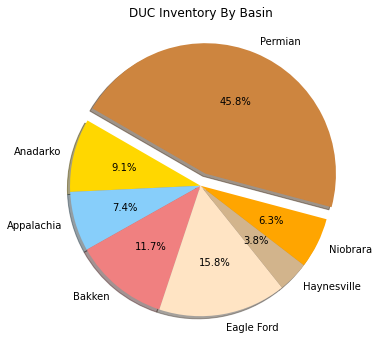

In [14]:
pie_df=DUCInventory_now_df[2:][['Anadarko_DUC','Appalachia_DUC','Bakken_DUC','Eagle Ford_DUC','Haynesville_DUC','Niobrara_DUC','Permian_DUC']]
## Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(pie_df,
    labels=["Anadarko", "Appalachia", "Bakken", "Eagle Ford", "Haynesville", "Niobrara", "Permian"],
    colors=["gold", "lightskyblue", "lightcoral", "bisque", "tan", "orange", "peru"],
    explode=[0, 0, 0,0,0,0,0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("DUC Inventory By Basin")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("PieChart.png")
plt.show()